In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt#Matplotlib for plotting graphs and its numerical processes
import seaborn as sns # data visualization based on omatplotlib, high-level interface
import folium #allows us to map with leaflet
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

In [2]:
#Using pandas to upload from our data source, csv file


data = pd.read_csv("AB_NYC_2019.csv", encoding='ISO-8859-1')

In [3]:
#Getting a brief view of the data  

data.head(20)

id                                              name  host_id  \
0   2539                Clean & quiet apt home by the park     2787   
1   2595                             Skylit Midtown Castle     2845   
2   3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3   3831                   Cozy Entire Floor of Brownstone     4869   
4   5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5   5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6   5121                                   BlissArtsSpace!     7356   
7   5178                  Large Furnished Room Near B'way      8967   
8   5203                Cozy Clean Guest Room - Family Apt     7490   
9   5238                Cute & Cozy Lower East Side 1 bdrm     7549   
10  5295                  Beautiful 1br on Upper West Side     7702   
11  5441                   Central Manhattan/near Broadway     7989   
12  5803    Lovely Room 1, Garden, Best Area, Legal rental     9744   
13  6021  Wonderful Guest Bedroom in Manhattan for SINGLES    11528   
14  6090                     West Village Nest - Superhost    11975   
15  6848                  Only 2 stops to Manhattan studio    15991   
16  7097                 Perfect for Your Parents + Garden    17571   
17  7322                                   Chelsea Perfect    18946   
18  7726   Hip Historic Brownstone Apartment with Backyard    20950   
19  7750                 Huge 2 BR Upper East  Cental Park    17985   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
5              Chris           Manhattan         Murray Hill  40.74767   
6              Garon            Brooklyn  Bedford-Stuyvesant  40.68688   
7           Shunichi           Manhattan      Hell's Kitchen  40.76489   
8          MaryEllen           Manhattan     Upper West Side  40.80178   
9                Ben           Manhattan           Chinatown  40.71344   
10              Lena           Manhattan     Upper West Side  40.80316   
11              Kate           Manhattan      Hell's Kitchen  40.76076   
12            Laurie            Brooklyn         South Slope  40.66829   
13           Claudio           Manhattan     Upper West Side  40.79826   
14             Alina           Manhattan        West Village  40.73530   
15     Allen & Irina            Brooklyn        Williamsburg  40.70837   
16              Jane            Brooklyn         Fort Greene  40.69169   
17              Doti           Manhattan             Chelsea  40.74192   
18  Adam And Charity            Brooklyn       Crown Heights  40.67592   
19              Sing           Manhattan         East Harlem  40.79685   

    longitude        room_type  price  minimum_nights  number_of_reviews  \
0   -73.97237     Private room    149               1                  9   
1   -73.98377  Entire home/apt    225               1                 45   
2   -73.94190     Private room    150               3                  0   
3   -73.95976  Entire home/apt     89               1                270   
4   -73.94399  Entire home/apt     80              10                  9   
5   -73.97500  Entire home/apt    200               3                 74   
6   -73.95596     Private room     60              45                 49   
7   -73.98493     Private room     79               2                430   
8   -73.96723     Private room     79               2                118   
9   -73.99037  Entire home/apt    150               1                160   
10  -73.96545  Entire home/apt    135               5                 53   
11  -73.98867     Private room     85          

In [4]:
#LNow for a more clear view of our data

print('\nRows : ', data.shape[0])
print('\nColumns : ',data.shape[1])
print('\nColumns : ',data.columns.to_list())
print('\nUnique:\n', data.nunique())


Rows :  48895

Columns :  16

Columns :  ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Unique:
 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


In [5]:
#Now we will check for any null or any missing values in our data set


data.isnull().sum().sort_values(ascending=False)

#Top missing data: reviews_per_month and last_review = 10052, host_name = 21, name = 16



reviews_per_month                 10052
last_review                       10052
host_name                            21
name                                 16
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

In [6]:
#If you wnated to drop all null values you would be dropping a little over 10,000 data points 
# cleaned_data = data.dropna()
# cleaned_data.shape


# or we can replace the name and host_name so we can
#keep 10,000 data points to give us a more accurate report

# replace_name = "&"
# replace_host_name = "%"

# data['name'].fillna(replace_name,inplace=True)
# data['host_name'].fillna(replace_host_name, inplace=True)
# data.isnull().sum().sort_values(ascending=False)

#Now we can drop the columns reviews per month and last_review
data.drop(['last_review'], axis=1, inplace=True)
data.drop(['reviews_per_month'], axis=1, inplace=True)

data.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
count    48895.000000       48895.000000                    48895.000000   
mean         7.029962          23.274466                        7.143982   
std         20.510550          44.550582                       32.952519   
min          1.000000           0.000000                        1.000000   
25%          1.000000           1.000000                        1.000000   
50%          3.000000           5.000000                        1.000000   
75%          5.000000          24.000000                        2.000000   
max       1250.000000         629.000000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

In [7]:
#Retrieving rows based on index label

data.loc[0]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                     40.6475
longitude                                                   -73.9724
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
calculated_host_listings_count                                     6
availability_365                                                 365
Name: 0, dtype: object

In [8]:
#Getting a summary what of our data looks like 
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 5.2+ MB


##Now let us begin our analysis

In [9]:
#Lets begin the analysis by looking at the different types of rooms and how many there are.

data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Room Types'),
 Text(0.5, 1.0, 'Bar Chart for Room Type')]

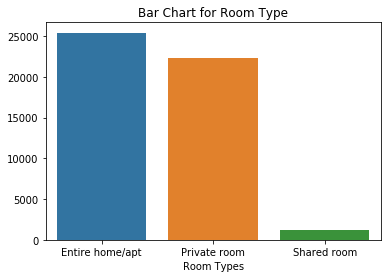

In [10]:
#Creating a 

room_bar_chart = sns.countplot(x='room_type', order = data.room_type.value_counts().index,data=data)

#adding title and labels
room_bar_chart.set(xlabel='Room Types', ylabel='', title='Bar Chart for Room Type')



##Now lets take a look at the different types of neighbourhood

In [11]:
# Percentage of neighbourhood groups

data.neighbourhood_group.value_counts(dropna = False, normalize = True)




Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64

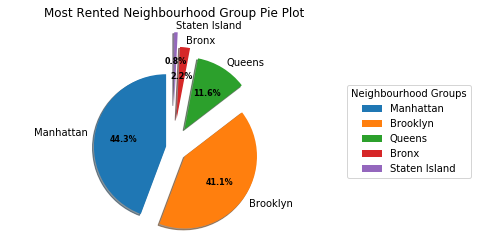

In [12]:
#Creating the pie chart to display different percentages of most preferred neighbourhood groups

labels = data.neighbourhood_group.value_counts().index #Creating chart's labels
sizes = data.neighbourhood_group.value_counts().values # total for each neighbourhood group
explode = (0.1, 0.2, 0.3, 0.4, 0.6)#How much space each section of the graph will have between each other

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                   shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set(title="Most Rented Neighbourhood Group Pie Plot")
ax.legend(wedges, labels,
          title="Neighbourhood Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
plt.show()


##Determining which neighbourhood in each neighbourhood group is the most preferred. 

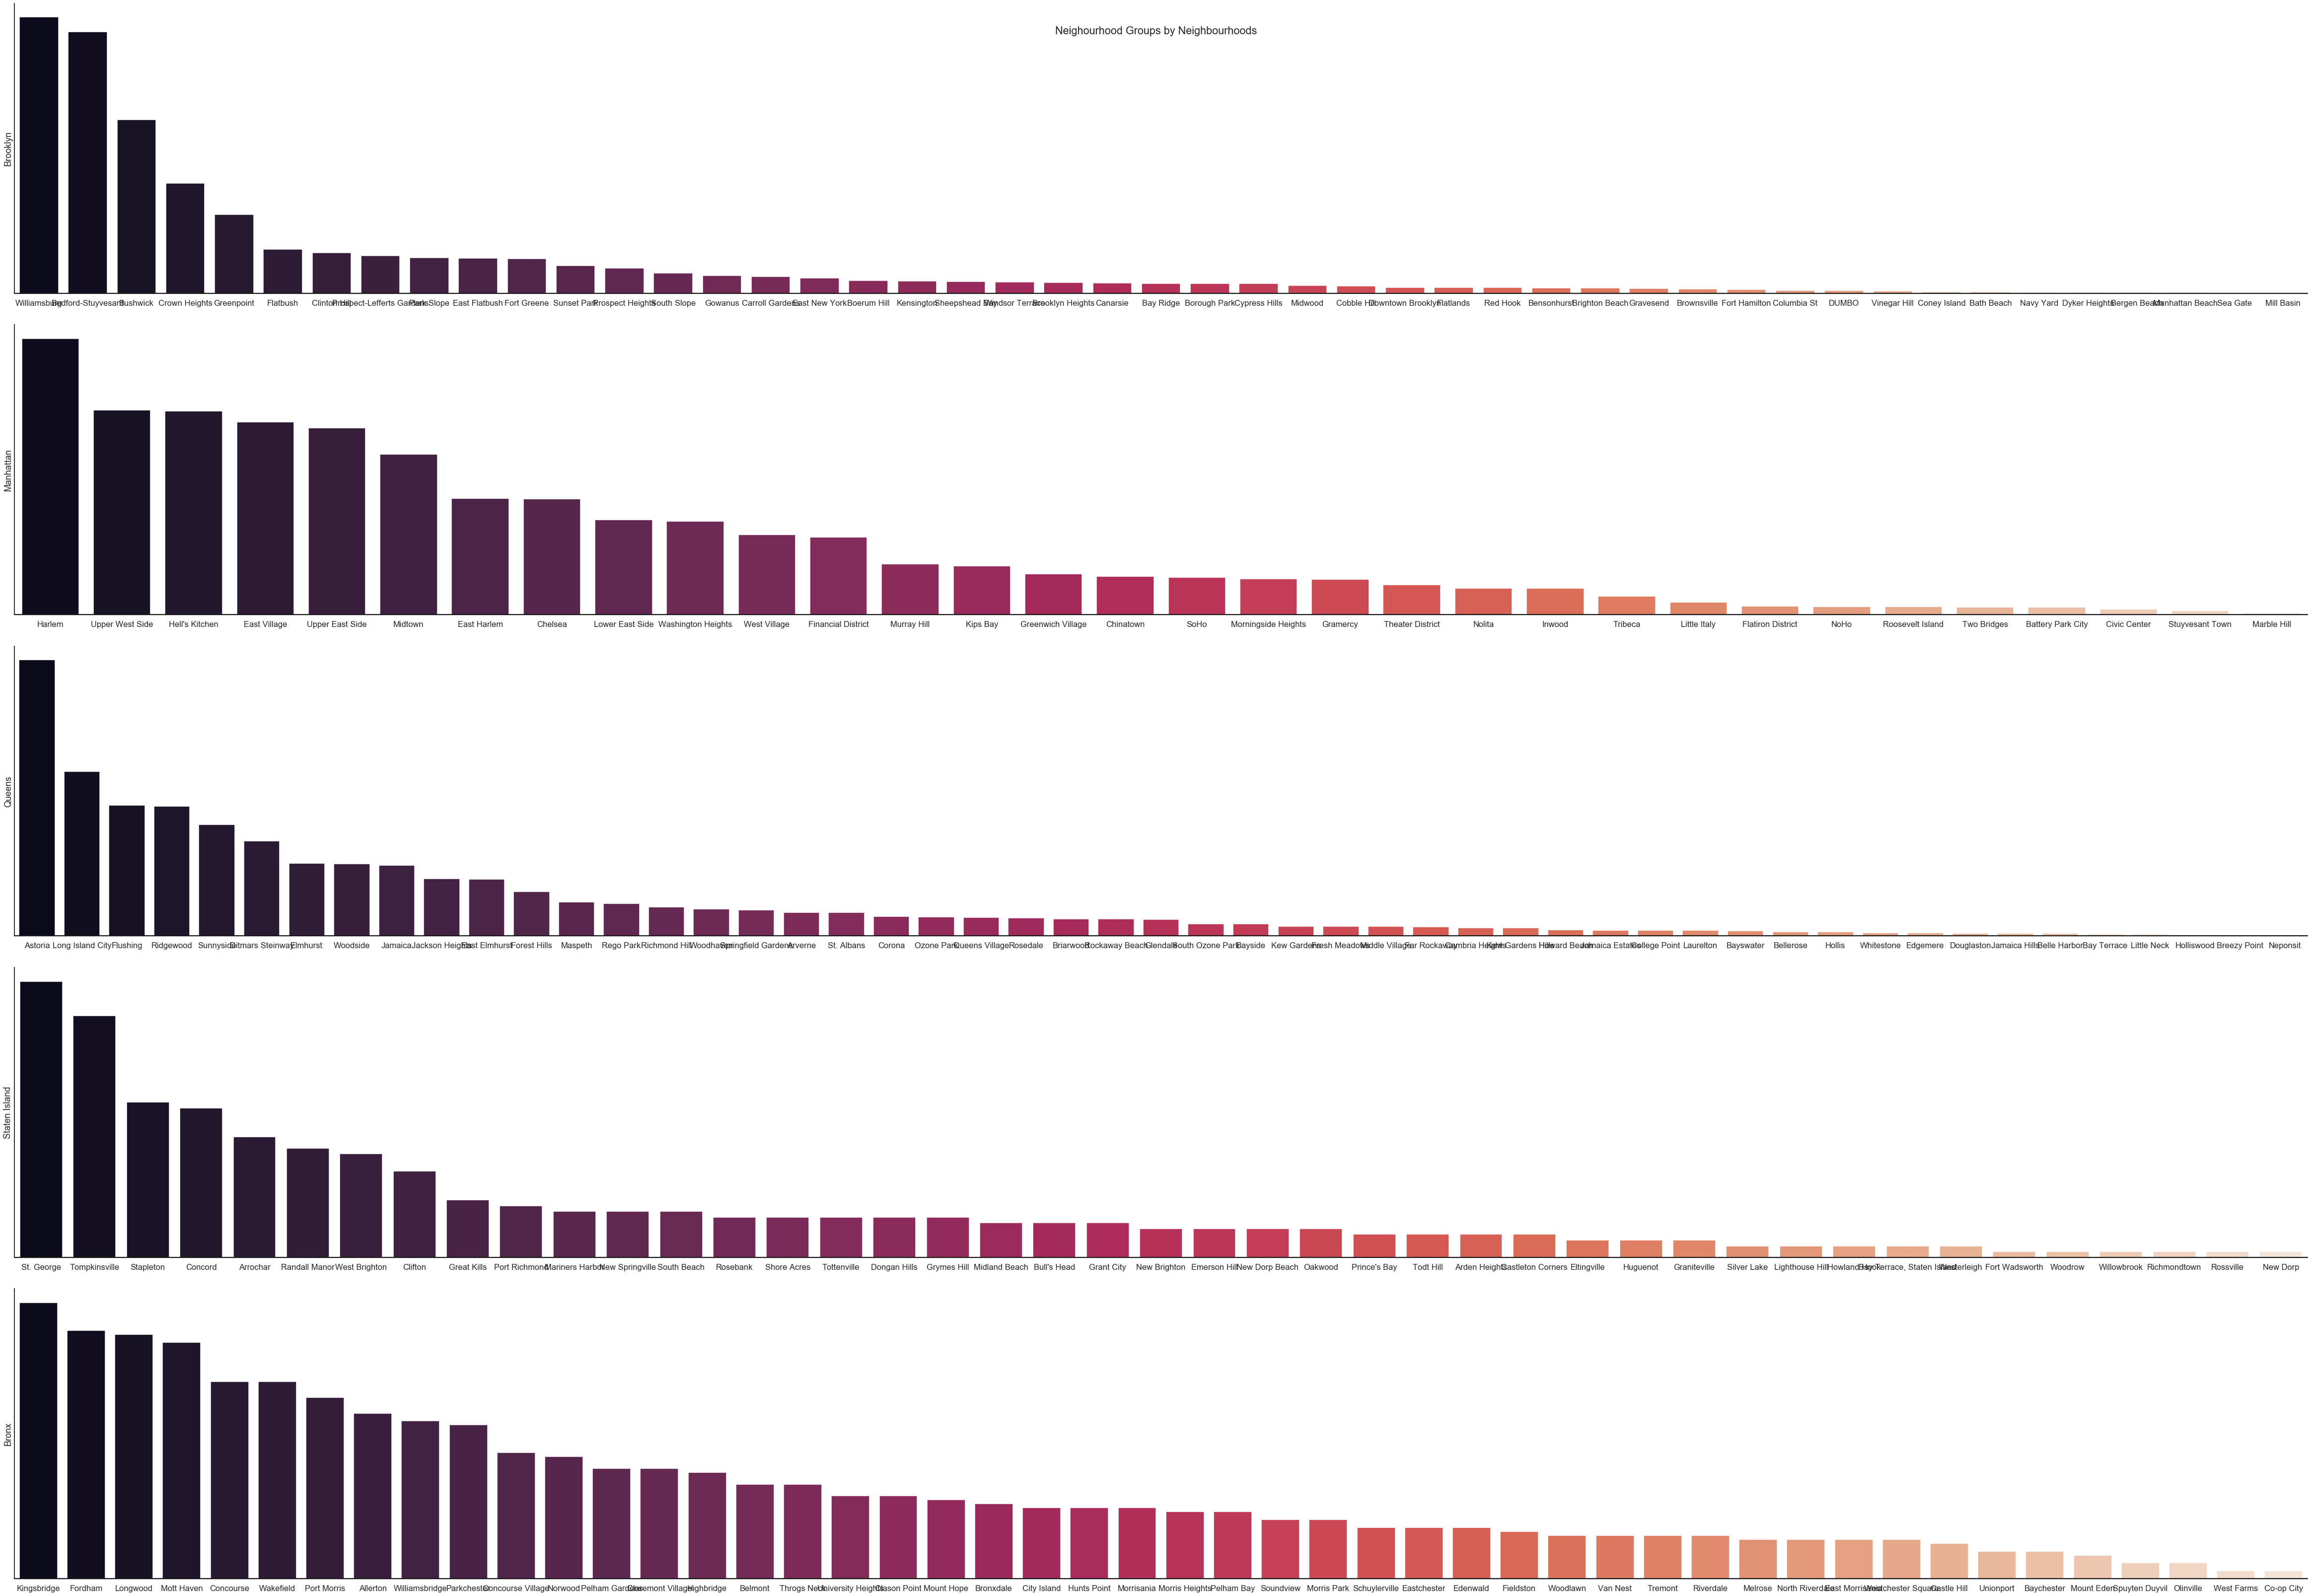

In [13]:
#Creating abar chart for each negihbourhood groups to show most preferred for each


sns.set(style='white', context='talk')

f, subplots = plt.subplots(len(data.neighbourhood_group.unique()), 1, figsize=(65,45))

for i, neighbourhood_group in enumerate(data.neighbourhood_group.unique()):
    neighbourhoods = data.neighbourhood[data.neighbourhood_group == neighbourhood_group]
    ax = subplots[i]
    x = np.array(neighbourhoods.value_counts().index)
    y = neighbourhoods.value_counts().values
    sns.barplot(x=x,y=y, palette='rocket', ax=ax)
    ax.axhline(0, color='k', clip_on=False)
    ax.set_ylabel(neighbourhood_group)
    
sns.despine(bottom=True)
f.suptitle('Neighourhood Groups by Neighbourhoods')
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.show()





#The following graphs show that the most popular areas to stay are:
    #Brooklyn(Williamsburg)
    #Manhattan(Harlem)
    #Queens(Astoria)
    #Staten ISland(St.George)
    #Bronx(Kingsbridge)
    

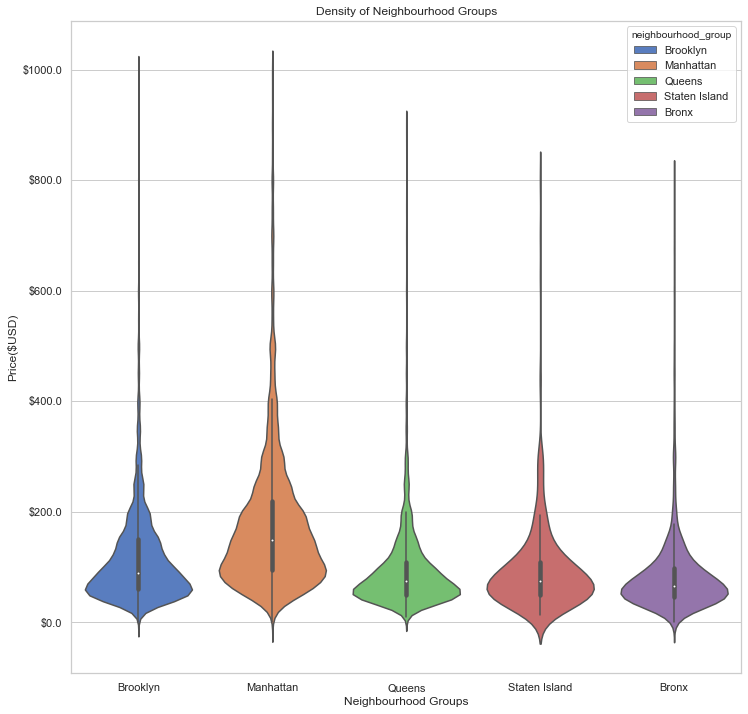

In [14]:
#Violin [plot to show density 

sns.set(style='whitegrid')

min_price = 1000
#Airbnb prices 
data_price= data[data.price < min_price]

#Set up the matplot figure 
fig, ax = plt.subplots(figsize=(12,12))

#Draw
density_hood_price_plot = sns.violinplot(ax=ax, x='neighbourhood_group', y='price', hue='neighbourhood_group', data=data_price, palette='muted', dodge=False) 
density_hood_price_plot.set(xlabel="Neighbourhood Groups", ylabel="Price($USD)", title="Density of Neighbourhood Groups")

ylabels = ['${}'.format(x) for x in density_hood_price_plot.get_yticks()]
density_hood_price_plot.set_yticklabels(ylabels)
plt.show()

## Now we can have an actual look at where this is taking place geographically for a better visual understanding.

In [15]:
#Using folium's heatmap to show most preferred areas

map = folium.Map([40.80, -73.80], zoom_start=11)
folium.plugins.HeatMap(data[['latitude','longitude']].dropna(), radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map)
display(map)

In [16]:
##Looking at New york with clsuters to get a visual of where the data is coming from geographically 



Long = -73.80
Lat=40.80
locations = list(zip(data.latitude,data.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

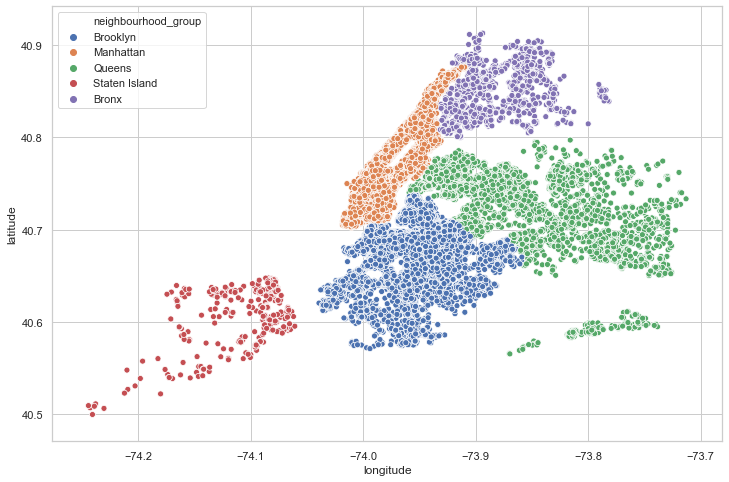

In [17]:
#Now putting the maps details into a scatter plot to get a better visualization


plt.figure(figsize=(12,8))
sns.scatterplot(x=data.longitude,y=data.latitude, hue=data.neighbourhood_group)
plt.show()